## Setting up environment

We install HuggingFace Transformers and Detectron2.

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install -q pyyaml==5.1
# workaround: install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9 (issue: https://github.com/facebookresearch/detectron2/issues/3158)
!pip install -q torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install detectron2 that matches pytorch 1.8
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install -q detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
!python -m pip install -q 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement torch==1.8.0+cu101 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu11

In [ ]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00


We also install PyTesseract:

In [ ]:
! sudo apt install tesseract-ocr
! pip install -q pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,145 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

## Getting the data


In [ ]:
!pip install Pillow==9.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


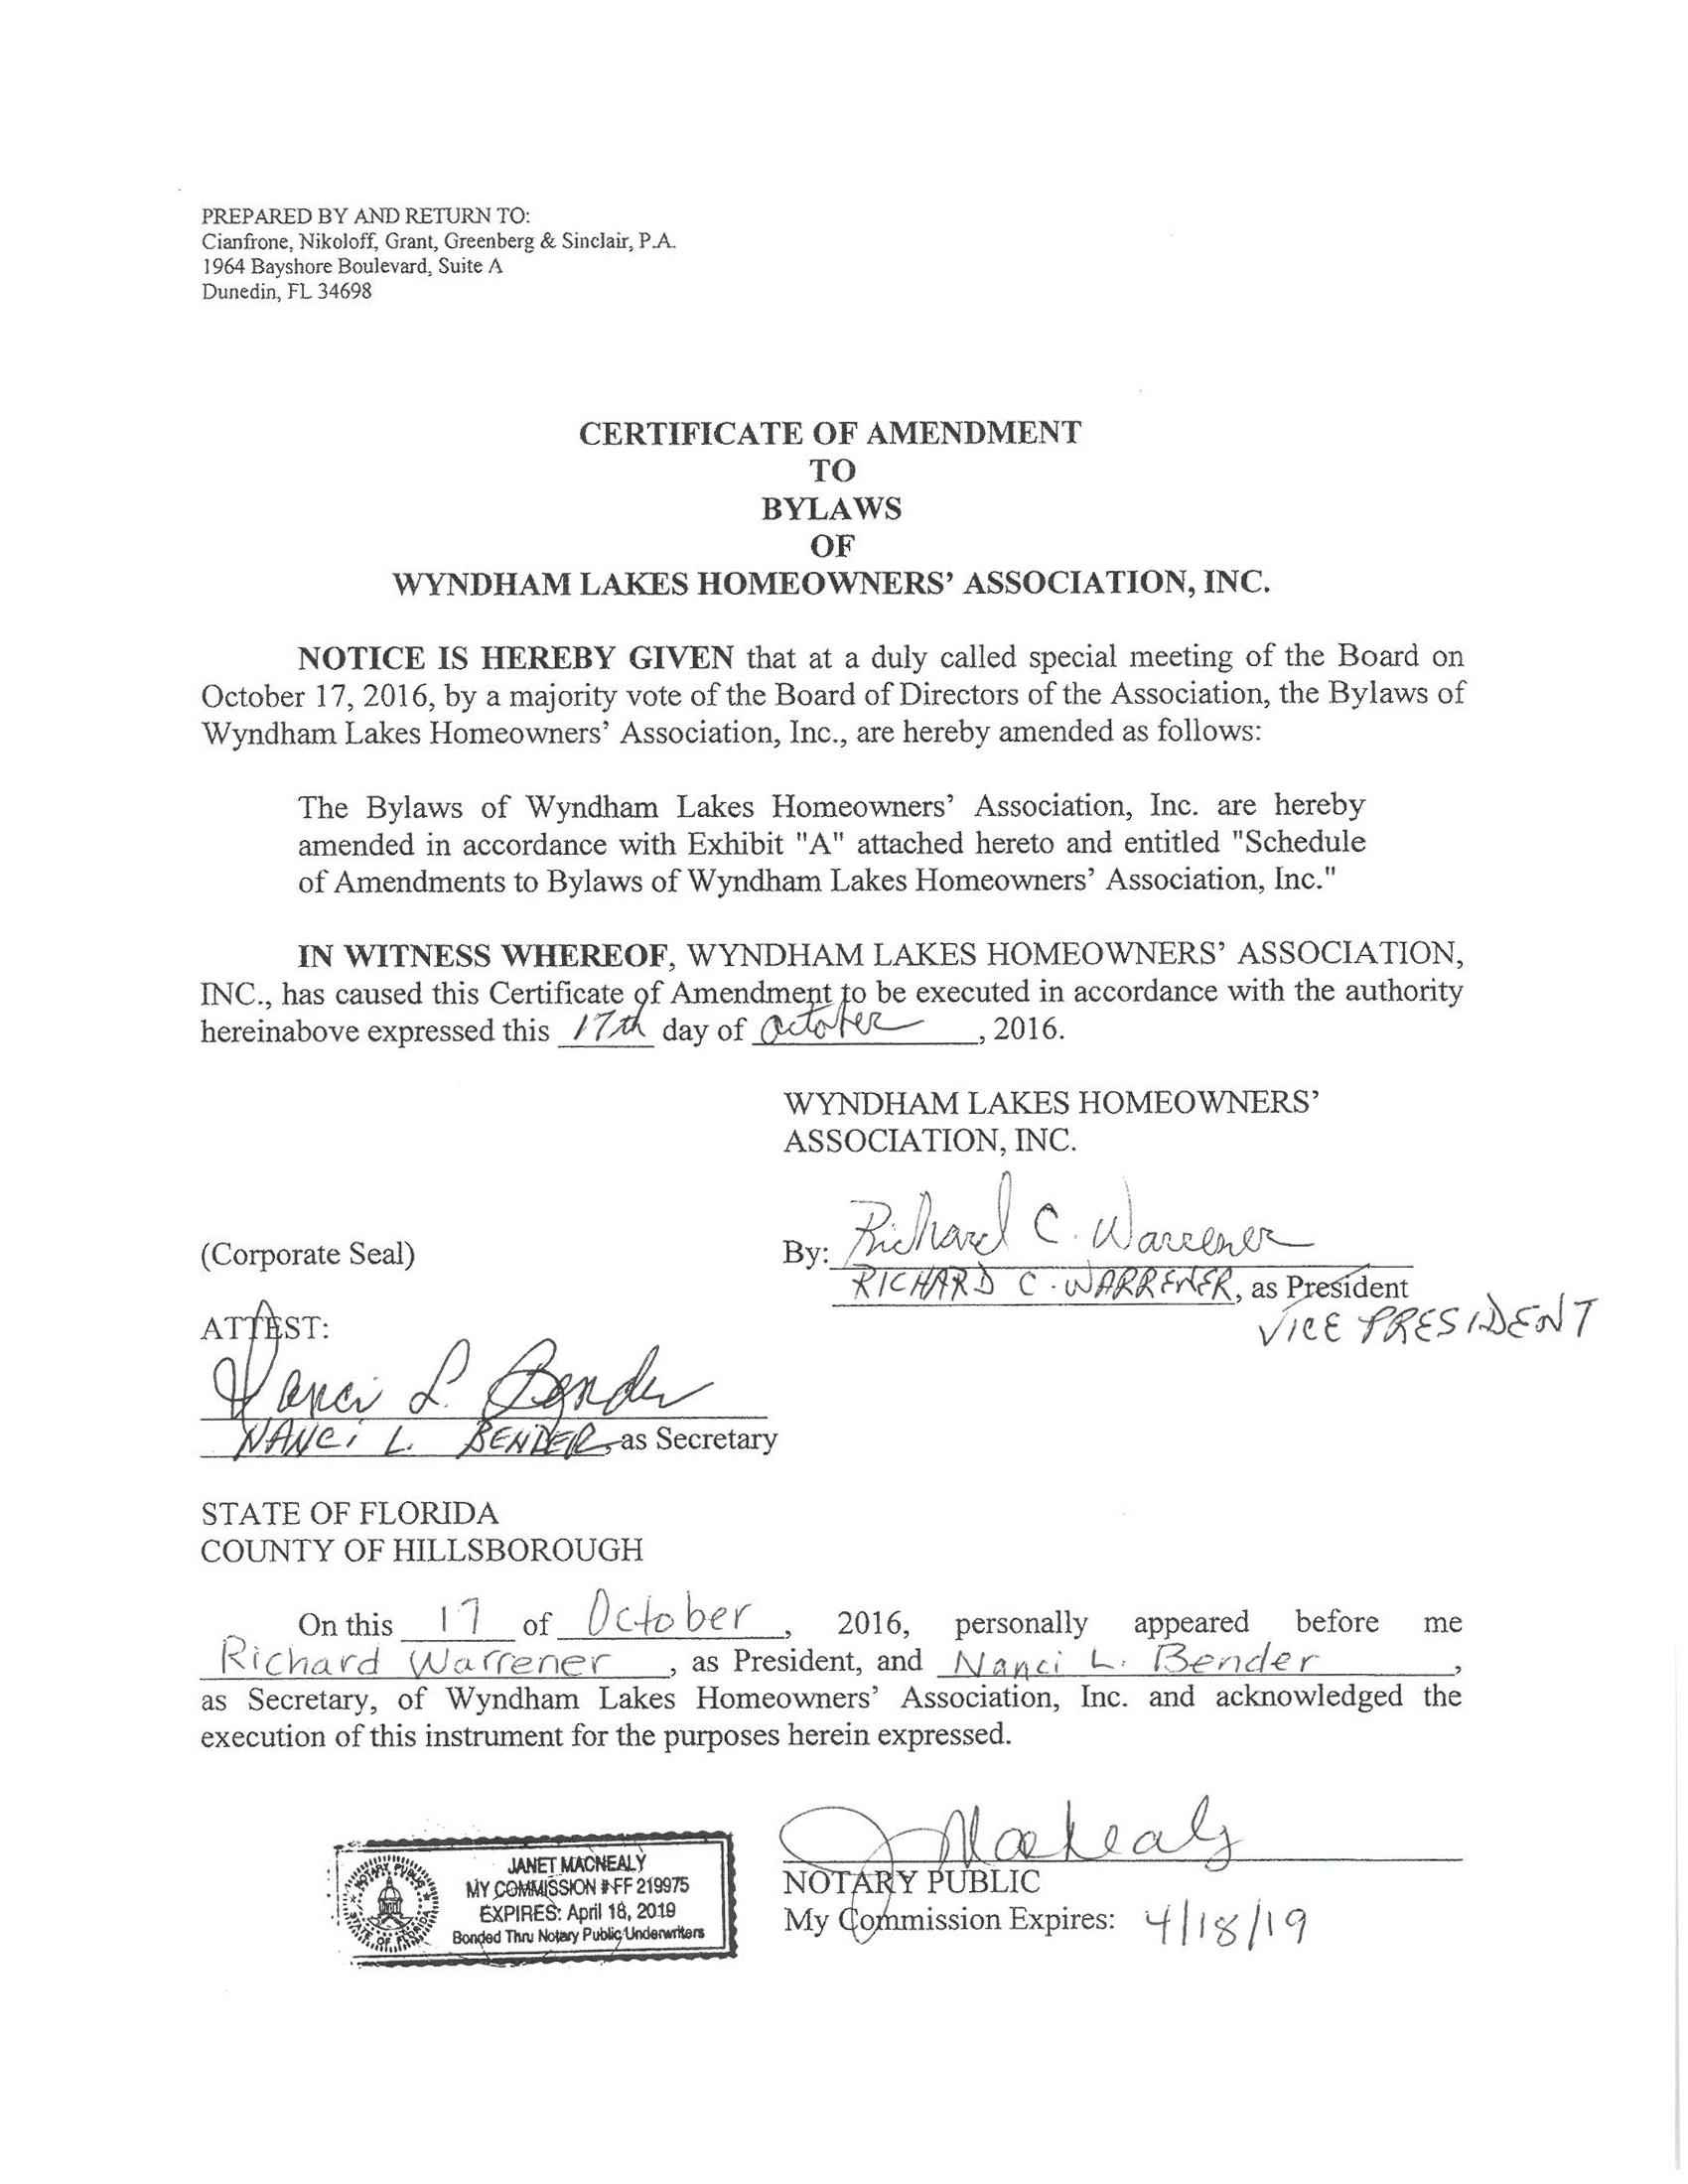

In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("/content/PDF_OCR/by_law/d11.tiff")
image = image.convert("RGB")
image

We can use the Tesseract OCR engine to turn the image into a list of recognized words:

In [ ]:
import pytesseract
import numpy as np

ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

"ot uv STATEMENT OF JEAN D, GIBBONS My name 4s Jean Dickinson Gibbons. My current position is Professor of Statistics and Chairman of the Applied Statistics Program at the Graduate School of the University of Alabana, I am currently a Fellow of both the American Statistical Association and the International Statistical Institute and a menber of the Committee on National Statistics of the National, Acadeny of Scdences. I received the bachelor's and master's degrees in mathematics from Duke University and the Ph.D. degree in statistics from Virginia Polytechnic Institute and State University. My previous faculty appointments were at the University of Pennsylvania and the University of Cincinnati. I was a senior Fulbright-Hays scholar at the Indian Statistical Institute in 1973. Twas Associate Editor of The Anertcan Statistician for eight years, currently act as editortal collaborator on many statistical journals, includ~ Technometrics, and serve as a reviewer for grant proposals to the N

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Specify the source folder path in Google Drive
source_folder_path = '/content/drive/MyDrive/PDF_OCR'

# Specify the destination folder path in Colab
destination_folder_path = '/content/PDF_OCR'

# Copy the entire folder from Google Drive to Colab
shutil.copytree(source_folder_path, destination_folder_path)


'/content/PDF_OCR'

In [ ]:
from transformers import LayoutLMv2FeatureExtractor, LayoutLMv2Tokenizer, LayoutLMv2Processor

feature_extractor = LayoutLMv2FeatureExtractor()
tokenizer = LayoutLMv2Tokenizer.from_pretrained("microsoft/layoutlmv2-base-uncased")
processor = LayoutLMv2Processor(feature_extractor, tokenizer)

/usr/local/lib/python3.10/dist-packages/transformers/models/layoutlmv2/feature_extraction_layoutlmv2.py:30: FutureWarning: The class LayoutLMv2FeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use LayoutLMv2ImageProcessor instead.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

In [ ]:
encoded_inputs = processor(image, return_tensors="pt")

In [ ]:
for k,v in encoded_inputs.items():
  print(k, v.shape)

input_ids torch.Size([1, 286])
bbox torch.Size([1, 286, 4])
token_type_ids torch.Size([1, 286])
attention_mask torch.Size([1, 286])
image torch.Size([1, 3, 224, 224])


Let's check whether the `input_ids` are created correctly by decoding them back to text:

In [ ]:
processor.tokenizer.decode(encoded_inputs.input_ids.squeeze().tolist())

"[CLS] ot uv statement of jean d, gibbons my name 4s jean dickinson gibbons. my current position is professor of statistics and chairman of the applied statistics program at the graduate school of the university of alabana, i am currently a fellow of both the american statistical association and the international statistical institute and a menber of the committee on national statistics of the national, acadeny of scdences. i received the bachelor's and master's degrees in mathematics from duke university and the ph. d. degree in statistics from virginia polytechnic institute and state university. my previous faculty appointments were at the university of pennsylvania and the university of cincinnati. i was a senior fulbright - hays scholar at the indian statistical institute in 1973. twas associate editor of the anertcan statistician for eight years, currently act as editortal collaborator on many statistical journals, includ ~ technometrics, and serve as a reviewer for grant proposal

Note that it also adds the special tokens ([CLS] and [SEP]). You can also pad to a max length, truncate, etc., just like you would do with a regular tokenizer.

## Preprocessing the data

First, we convert the dataset into a Pandas dataframe, having 2 columns: image_path and label.

In [ ]:
import pandas as pd
import os

dataset_path = "/content/PDF_OCR"
labels = [label for label in os.listdir(dataset_path)]
id2label = {v: k for v, k in enumerate(labels)}
label2id = {k: v for v, k in enumerate(labels)}
label2id

{'insurance': 0,
 'cc&r': 1,
 'rules&regulations': 2,
 'by_law': 3,
 'plat': 4,
 'finances': 5}

In [ ]:
images = []
labels = []

for label_folder, _, file_names in os.walk(dataset_path):
  if label_folder != dataset_path:
    label = label_folder[40:]
    for _, _, image_names in os.walk(label_folder):
      relative_image_names = []
      for image_file in image_names:
        relative_image_names.append(dataset_path + "/" + label + "/" + image_file)
      images.extend(relative_image_names)
      labels.extend([label] * len (relative_image_names))

data = pd.DataFrame.from_dict({'image_path': images, 'label': labels})
data.head()

,image_path,label
0,/content/PDF_OCR//d24.tiff,
1,/content/PDF_OCR//d23.tiff,
2,/content/PDF_OCR//d18.tiff,
3,/content/PDF_OCR//d10.tiff,
4,/content/PDF_OCR//d4.tiff,


In [ ]:
import os
import pandas as pd
# Update with your actual dataset path

images = []
labels = []

for label_folder, _, _ in os.walk(dataset_path):
    if label_folder != dataset_path:
        label = label_folder[len(dataset_path) + 1:]
        image_names = [image_file for image_file in os.listdir(label_folder) if image_file.endswith(".tiff")]
        relative_image_names = [os.path.join(label_folder, image_file) for image_file in image_names]
        images.extend(relative_image_names)
        labels.extend([label] * len(relative_image_names))

data = pd.DataFrame.from_dict({'image_path': images, 'label': labels})
data.head(20)


,image_path,label
0,/content/PDF_OCR/insurance/d24.tiff,insurance
1,/content/PDF_OCR/insurance/d23.tiff,insurance
2,/content/PDF_OCR/cc&r/d18.tiff,cc&r
3,/content/PDF_OCR/cc&r/d10.tiff,cc&r
4,/content/PDF_OCR/cc&r/d4.tiff,cc&r


In [ ]:
len(set(labels))

6

In [ ]:
from datasets import Dataset

# read dataframe as HuggingFace Datasets object
dataset = Dataset.from_pandas(data)

In [ ]:
dataset

Dataset({
    features: ['image_path', 'label'],
    num_rows: 26
})

In [ ]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

# we need to define custom features
features = Features({
    'image': Array3D(dtype="int64", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': ClassLabel(num_classes=len(set(labels)), names=list(set(labels))),
})

def preprocess_data(examples):
  # take a batch of images
  images = [Image.open(path).convert("RGB") for path in examples['image_path']]

  encoded_inputs = processor(images, padding="max_length", truncation=True)

  # add labels
  encoded_inputs["labels"] = [label2id[label] for label in examples["label"]]

  return encoded_inputs

encoded_dataset = dataset.map(preprocess_data, remove_columns=dataset.column_names, features=features,
                              batched=True, batch_size=2)

Map:   0%|          | 0/26 [00:00<?, ? examples/s]

Next, we set the format to PyTorch tensors. We also specify to put everything on the GPU (CUDA).

In [ ]:
encoded_dataset.set_format(type="torch", device="cuda")

We can create a PyTorch dataloader now:

In [ ]:
import torch

dataloader = torch.utils.data.DataLoader(encoded_dataset, batch_size=4)
batch = next(iter(dataloader))

In [ ]:
for k,v in batch.items():
  print(k, v.shape)

image torch.Size([4, 3, 224, 224])
input_ids torch.Size([4, 512])
attention_mask torch.Size([4, 512])
token_type_ids torch.Size([4, 512])
bbox torch.Size([4, 512, 4])
labels torch.Size([4])


In [ ]:
processor.tokenizer.decode(batch['input_ids'][0].tolist())

'[CLS] insurance policy listing turnbury birkdale subassociation, inc [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

In [ ]:
id2label[batch['labels'][0].item()]

'insurance'

## Define the model

Here we define the model, namely `LayoutLMv2ForSequenceClassification`. We initialize it with the weights of the pre-trained base model (`LayoutLMModel`). The weights of the classification head are randomly initialized, and will be fine-tuned together with the weights of the base model on our tiny dataset. Once loaded, we move it to the GPU.

In [ ]:
from transformers import LayoutLMv2ForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMv2ForSequenceClassification.from_pretrained("microsoft/layoutlmv2-base-uncased",
                                                            num_labels=len(labels))
model.to(device)

pytorch_model.bin:   0%|          | 0.00/802M [00:00<?, ?B/s]

Some weights of LayoutLMv2ForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlmv2-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LayoutLMv2ForSequenceClassification(
  (layoutlmv2): LayoutLMv2Model(
    (embeddings): LayoutLMv2Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 128)
      (y_position_embeddings): Embedding(1024, 128)
      (h_position_embeddings): Embedding(1024, 128)
      (w_position_embeddings): Embedding(1024, 128)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (visual): LayoutLMv2VisualBackbone(
      (backbone): FPN(
        (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
        (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
        (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

## Train the model

Here we train the model in familiar PyTorch fashion. We use the Adam optimizer with weight decay fix (normally you can also specify which variables should have weight decay and which not + a learning rate scheduler, see here for how the authors of LayoutLM did this), and train for 30 epochs. If the model is able to overfit it, then it means there are no issues and we can train it on the entire dataset.

In [ ]:
from transformers import AdamW
from tqdm.notebook import tqdm

optimizer = AdamW(model.parameters(), lr=5e-5)

global_step = 0
num_train_epochs = 10
t_total = len(dataloader) * num_train_epochs # total number of training steps

#put the model in training mode
model.train()
for epoch in range(num_train_epochs):
  print("Epoch:", epoch)
  running_loss = 0.0
  correct = 0
  for batch in tqdm(dataloader):
      # forward pass
      outputs = model(**batch)
      loss = outputs.loss

      running_loss += loss.item()
      predictions = outputs.logits.argmax(-1)
      correct += (predictions == batch['labels']).float().sum()

      # backward pass to get the gradients
      loss.backward()

      # update
      optimizer.step()
      optimizer.zero_grad()
      global_step += 1

  print("Loss:", running_loss / batch["input_ids"].shape[0])
  accuracy = 100 * correct / len(data)
  print("Training accuracy:", accuracy.item())

Epoch: 0


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:423: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 11.549572110176086
Training accuracy: 3.846153974533081
Epoch: 1


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 7.729379892349243
Training accuracy: 38.46154022216797
Epoch: 2


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 6.063169449567795
Training accuracy: 42.30769348144531
Epoch: 3


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 5.383351653814316
Training accuracy: 57.69231033325195
Epoch: 4


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 4.330435663461685
Training accuracy: 65.3846206665039
Epoch: 5


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 3.440398648381233
Training accuracy: 73.0769271850586
Epoch: 6


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 2.6365049928426743
Training accuracy: 73.0769271850586
Epoch: 7


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 2.007430799305439
Training accuracy: 80.76923370361328
Epoch: 8


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 2.1000997945666313
Training accuracy: 84.61538696289062
Epoch: 9


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 1.4494266137480736
Training accuracy: 96.15384674072266


## Inference

To perform inference on a new document image, 3 things need to be done:

1. prepare the image for the model using `LayoutLMv2Processor`
2. forward pass through the model
3. convert the output of the model to an actual label name

Let's take the first image of the training dataset as an example.

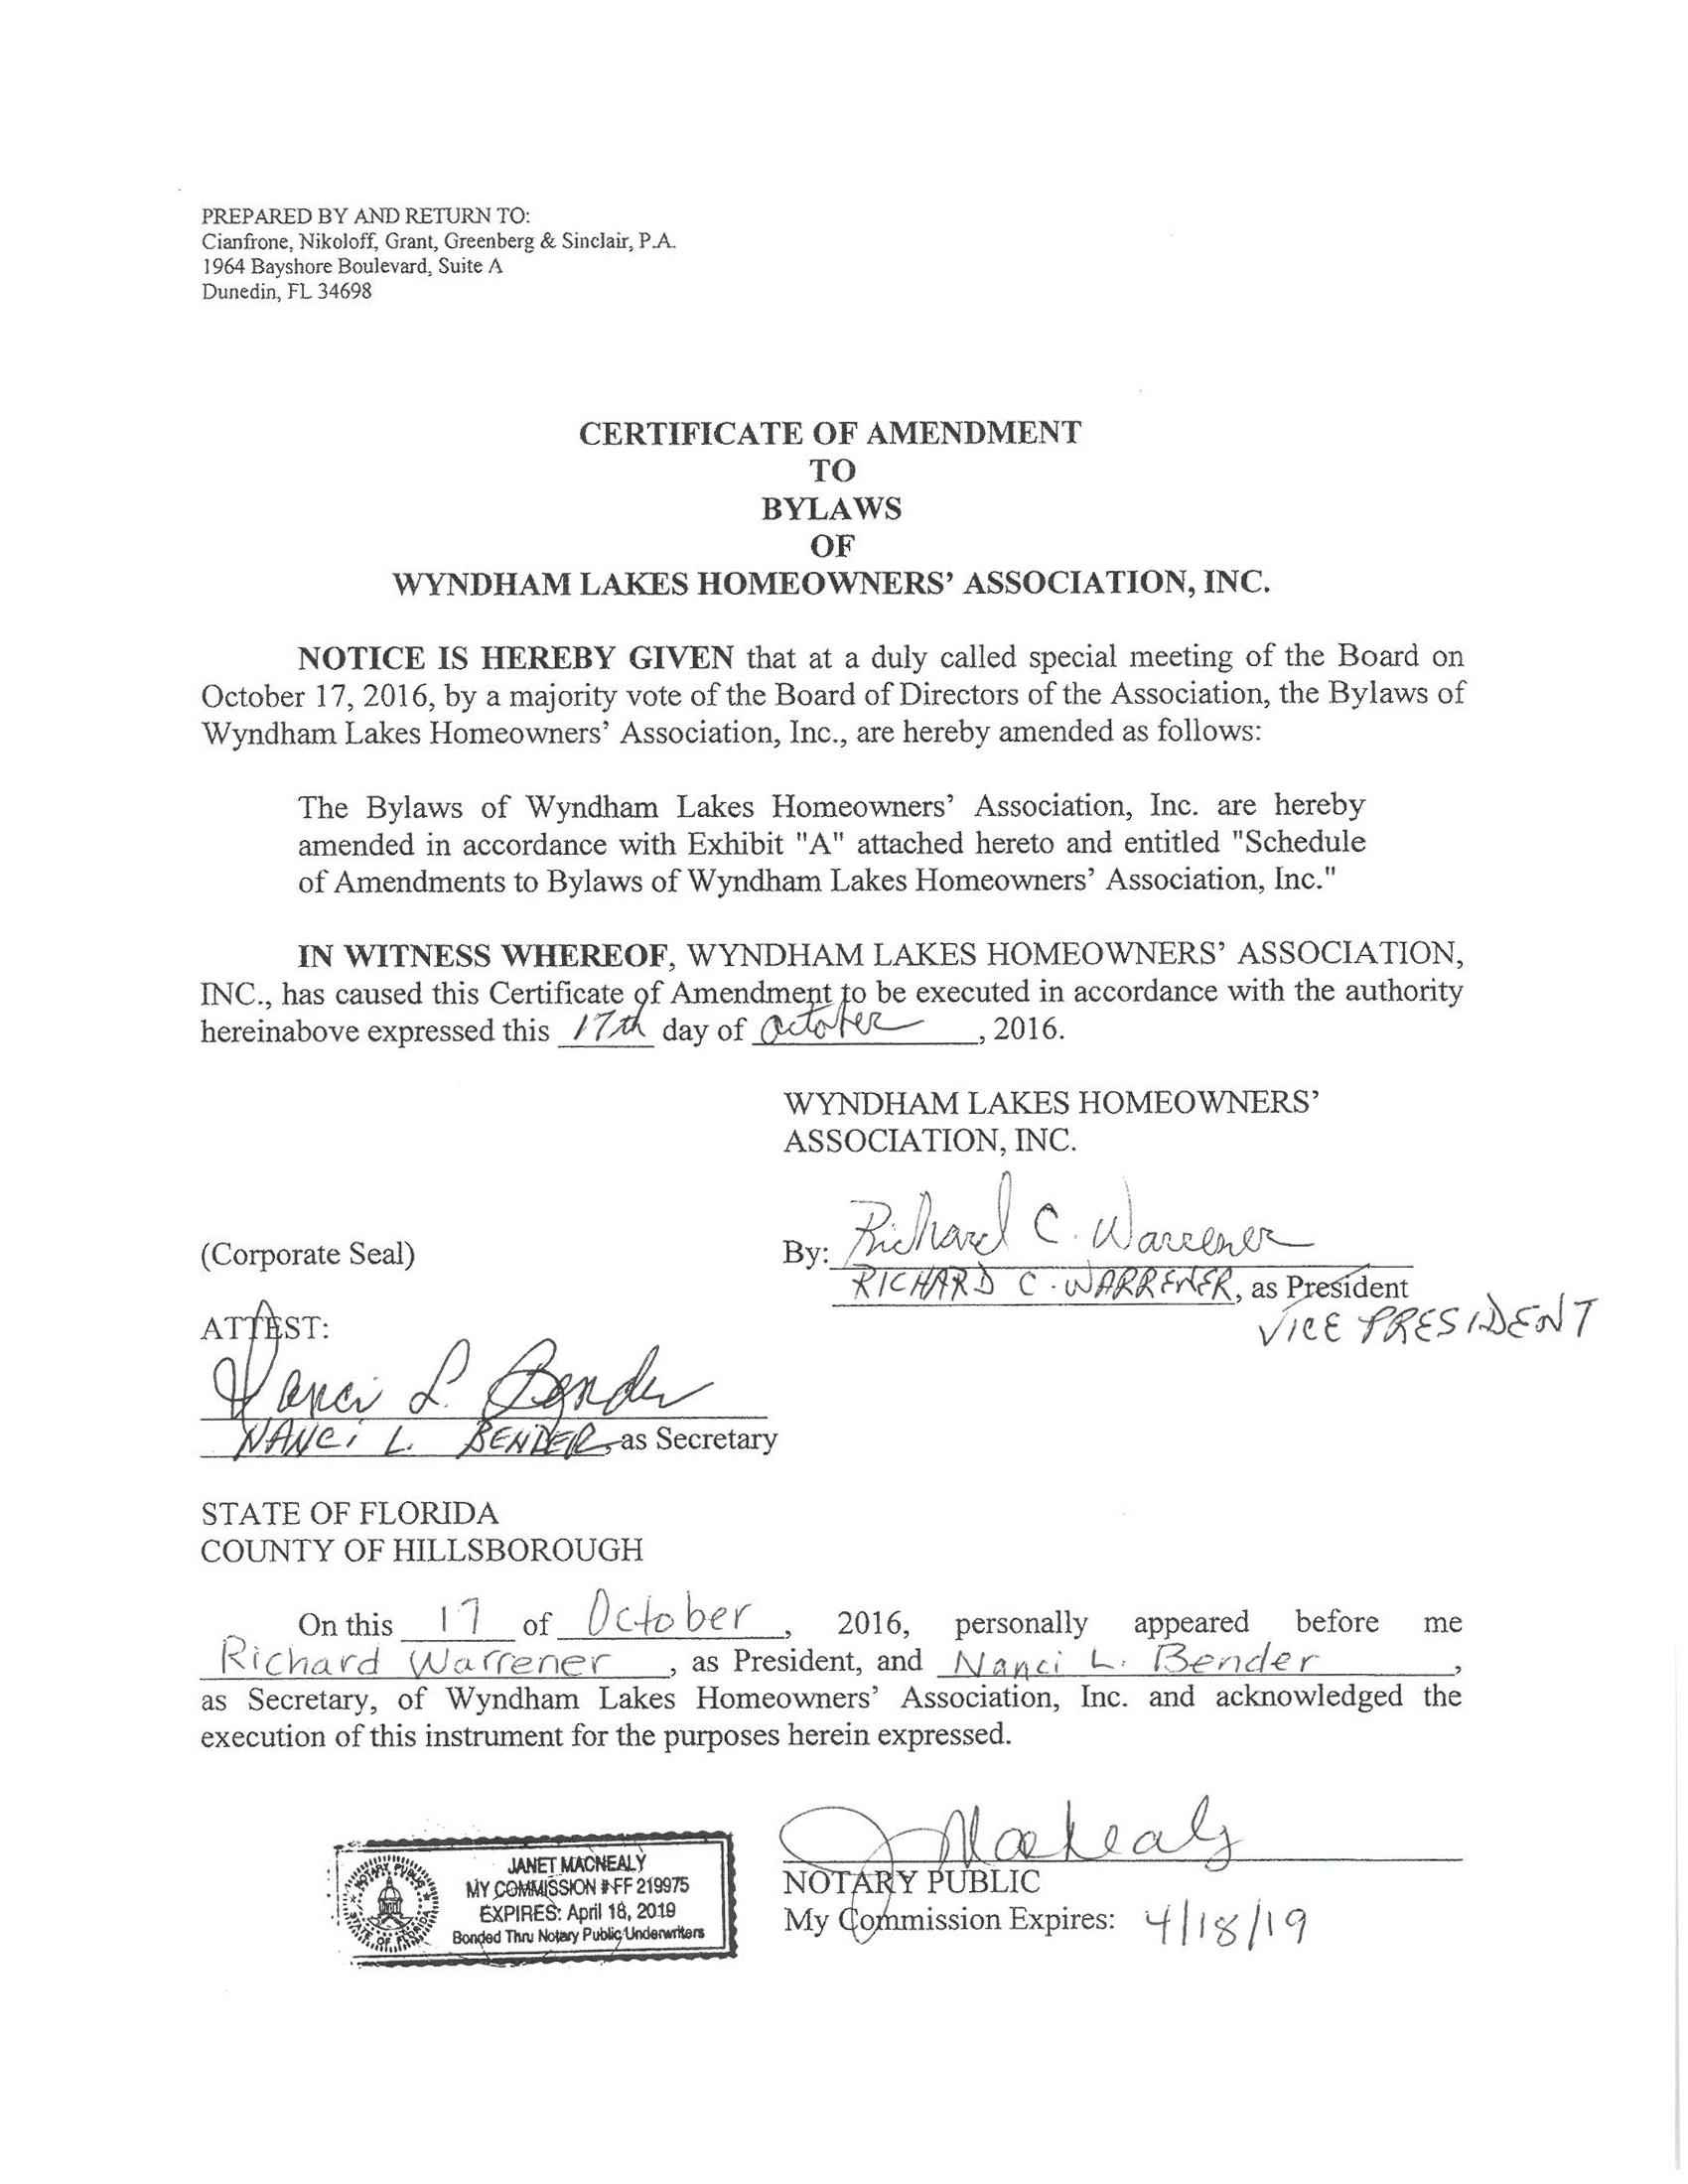

In [ ]:
image

In [ ]:
# prepare image for the model
encoded_inputs = processor(image, return_tensors="pt")

# make sure all keys of encoded_inputs are on the same device as the model
for k,v in encoded_inputs.items():
  encoded_inputs[k] = v.to(model.device)

# forward pass
outputs = model(**encoded_inputs)

The model outputs `logits` of shape (batch_size, num_labels):

In [ ]:
logits = outputs.logits
print(logits.shape)

torch.Size([1, 26])


We simply take the largest logit (i.e. `argmax` on the last dimension), and convert it back to a string using the `id2label` dictionary we created earlier.

In [ ]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", id2label[predicted_class_idx])

Predicted class: by_law


In [ ]:
# Specify the directory where you want to save the tokenizer
tokenizer_dir = "/content/OCRmodel"

# Save the tokenizer and its vocabulary to the specified directory
tokenizer.save_pretrained(tokenizer_dir)

('/content/OCRmodel/tokenizer_config.json',
 '/content/OCRmodel/special_tokens_map.json',
 '/content/OCRmodel/vocab.txt',
 '/content/OCRmodel/added_tokens.json')

In [ ]:
# Specify the directory where you want to save the model
model_dir = "/content/OCRmodel"

# Save the model and its configuration to the specified directory
model.save_pretrained(model_dir)

In [ ]:
import shutil

# Specify the source folder path in Google Drive
source_folder_path = '/content/OCRmodel'

# Specify the destination folder path in Colab
destination_folder_path = '/content/drive/MyDrive/OCRmodel'

# Copy the entire folder from Google Drive to Colab
shutil.copytree(source_folder_path, destination_folder_path)


'/content/drive/MyDrive/OCRmodel'